This is an open-ended project. The dataset lists the data of one water heater on Mar 18th, 2020 in Shanghai China. This project will answer the following questions:
1. What's the user behavior?
    - How many times was water used? How much water was used each time? How much electricity was cost? 
    - What's the potential demand of this user? 
2. Can this water heater meet the user's needs?
    - Does this water heater function well? For example, how long is the waiting time to get warm water?
    - Are there anything to improve?

## 1 Import data
The raw data is a *.csv file containing data between 7:00 and 21:00 on Mar 18th, 2020. It has 1137 rows and 94 columns.

There are missing data in certain columns such as "scenario". Considering this column has the same value for all rows, it was dropped. Similarly, other columns which have constant values for all rows were dropped. This is to say, this water heater has lots of fancy functions, but the user did not use them on Mar 18th, 2020.

The simplified data shape is 1137*11. 

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.dates
import matplotlib.dates as mdates


pd.options.mode.chained_assignment = None

In [2]:
raw_data = pd.read_excel('MideaRawInput.xlsx', sheet_name='原始数据')
# raw_data.head()
# raw_data.isnull().sum() # there is no null data in the dataset

## 2 Data cleaning and feature selection
The selected features are believed to show user behaviors. 

The values of categorical columns are converted to 1 and 0 for clear visualization.

In [3]:
# Delete the columns which have the same value in the whole day
# Delete multiple time records
# 'existwaterflow' was deleted b/c it has less infomation than "waterflow" 
# The status of 'bottomheatingtubesw'&'topheatingtubesw' is consistent with "switch", so I will not keep them
# "need update clock" is also dropped

cols = ['time','switch','heatingstatus','keepwarmstatus','currenttemp','waterremaining',
       'waterflow','heatremainmins','settemp','heatertoptemp', 'inwatertemp']
data = raw_data[cols]

data['time']=pd.to_datetime(data['time'],format='%Y-%m-%d %H:%M:%S')
data['switch'] = data['switch'].map({'开机':1,'关机':0})
data['heatingstatus'] = data['heatingstatus'].map({'开':1,'关':0})
data['keepwarmstatus'] = data['keepwarmstatus'].map({'开':1,'关':0})
data['waterflow'] = data['waterflow']/600  # change the unit from L/(10 min) to L/s
# data = data[data['waterflow']>0]
data
# data.shape
# data.isnull().sum()

,time,switch,heatingstatus,keepwarmstatus,currenttemp,waterremaining,waterflow,heatremainmins,settemp,heatertoptemp,inwatertemp
0,2020-03-18 07:40:33,1,1,0,41,30,0.000000,20,55,41,38
1,2020-03-18 07:40:34,1,1,0,41,30,0.000000,20,55,41,38
2,2020-03-18 07:40:52,1,1,0,41,30,0.010000,20,55,41,38
3,2020-03-18 07:40:53,1,1,0,41,30,0.018333,20,55,41,38
4,2020-03-18 07:40:54,1,1,0,41,30,0.000000,20,55,41,38
...,...,...,...,...,...,...,...,...,...,...,...
1132,2020-03-18 20:48:54,1,1,0,53,60,0.061667,3,55,53,50
1133,2020-03-18 20:48:54,1,1,0,53,60,0.063333,3,55,53,50
1134,2020-03-18 20:48:56,1,1,0,53,60,0.035000,3,55,53,50
1135,2020-03-18 20:48:57,1,0,1,53,60,0.010000,3,55,53,50


## 3 Data visualization

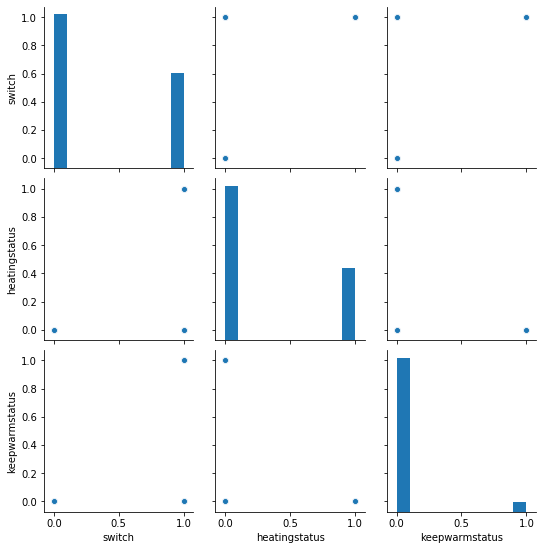

In [12]:
import seaborn as sns
sns.pairplot(data[['switch','heatingstatus','keepwarmstatus']])

The above figure tells that the water heater is either ON or OFF. 
When the water heater is ON, it is either at "heat status" or at "keep warm status". 

This means the water heater is working normally.

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

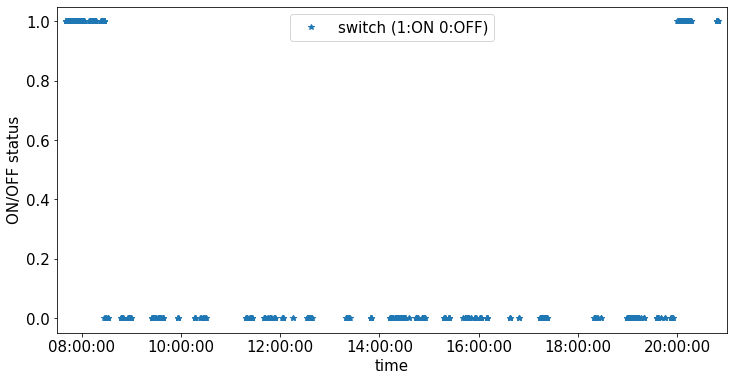

In [13]:
switchplot = data[['time','switch','heatingstatus','keepwarmstatus']]
switchplot.set_index('time', inplace=True)
switchplot.index = pd.to_datetime(switchplot.index)

plt.figure(figsize=(12,6))
plt.plot(switchplot.index,switchplot['switch'],'*',label ='switch (1:ON 0:OFF)')
# plt.plot(switchplot.index,switchplot['heatingstatus'],'.',label = 'heatingstatus')
# plt.plot(switchplot.index,switchplot['keepwarmstatus'],'*',color='green')

plt.legend(frameon=True, fontsize=15)

ax=plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) #'%Y-%m-%d %H:%M:%S'
ax.set_xlim(pd.Timestamp('2020-03-18 7:30:00'),pd.Timestamp('2020-03-18 21:00:00'))
# ax.set_ylim(0,1)
ax.set_xlabel('time',fontsize=15)
ax.set_ylabel('ON/OFF status',fontsize=15)
# when the WaterHeater is ON, it's not always heating. 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

The above figure shows that this user began to use water at 7:40am. After 45 min, the water hearter had been turned off. It was OFF during the day. After 20:00, the water heater was turend ON again.

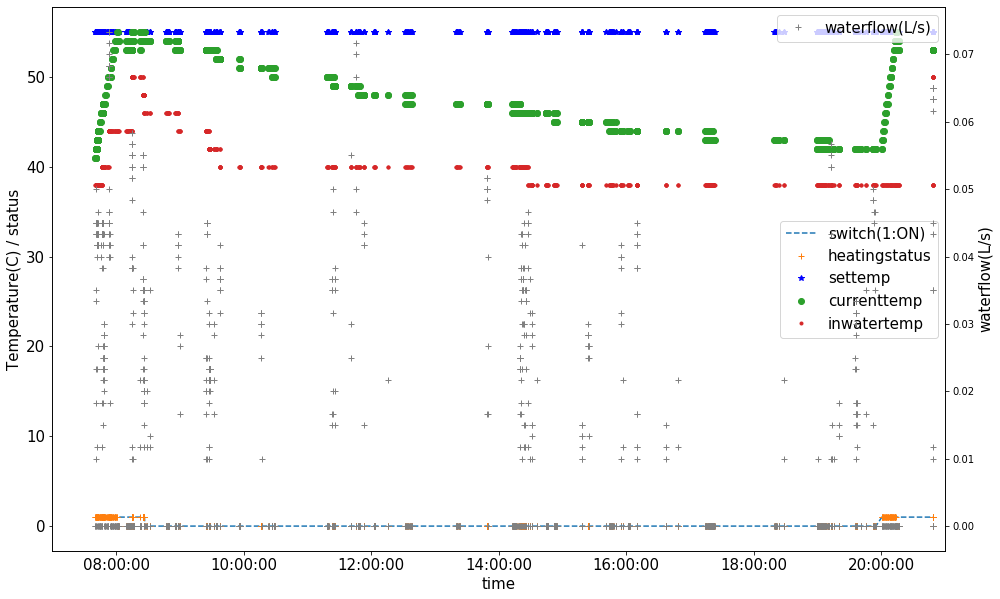

In [6]:
numplot = data[['time','switch','heatingstatus','currenttemp','waterremaining','waterflow','heatremainmins',
                'settemp','inwatertemp','heatertoptemp']] 
numplot.set_index('time', inplace=True)
numplot.index = pd.to_datetime(numplot.index)

plt.figure(figsize=(16,10))
plt.plot(numplot.index,numplot['switch'],'--',label ='switch(1:ON)')
plt.plot(numplot.index,numplot['heatingstatus'],'+',label = 'heatingstatus')
# plt.plot(numplot.index,numplot['heatertoptemp'],'<',label = 'heatertoptemp') # a little bit higher than current temp, delete it
# plt.plot(numplot.index,numplot['waterremaining'],'<',label = 'waterremaning')
# plt.plot(numplot.index,numplot['heatremainmins'],'<',label = 'heatremainmins')

plt.plot(numplot.index,numplot['settemp'],'*',color='blue', label = 'settemp')
plt.plot(numplot.index,numplot['currenttemp'],'o',label = 'currenttemp')
plt.plot(numplot.index,numplot['inwatertemp'],'.',label = 'inwatertemp')

plt.legend(frameon=True, prop={'size':15},loc='best') #loc='lower center',bbox_to_anchor=(1.1,1.05)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax=plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) #'%Y-%m-%d %H:%M:%S'
ax.set_xlim(pd.Timestamp('2020-03-18 07:00:00'),pd.Timestamp('2020-03-18 21:00:00'))
# ax.set_xlim(pd.Timestamp('2020-03-18 07:30:00'),pd.Timestamp('2020-03-18 9:00:00'))
# ax.set_ylim(0,1)
ax.set_xlabel('time',fontsize=15)
ax.set_ylabel('Temperature(C) / status',fontsize=15)

ax2 = ax.twinx()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) #'%Y-%m-%d %H:%M:%S'
ax2.plot(numplot.index, numplot['waterflow'],'+',color='gray', label='waterflow(L/s)')
ax2.set_ylabel('waterflow(L/s)', fontsize=15)
ax2.legend(loc=0, fontsize=15)

What can we read from the figure?
1. The "current temperature" at 7:40am is 41C, which is much lower than the "set temp"(55C). This means the water heater was OFF before 7:40am. This user turned off the water heater at night though we don't know when. That's to say, this dataset did not cover all the water use data for the whole day.

2. The "water remaining" is between 30L and 60L, while about 80% of the time, the remaining water is 40~50L. This means a) the maximum volumne of this water heater is 60L 2) probably this water heater is too big for this user.

3. When the water heater's state is changed from OFF to ON, it took 20min to reach the set temperature 55C. Is 20 min too long for the user?

What does the data tell us?
1. From 7:40 to 21:00, there is water flow for the majority of the time. Considering 3/18/2020 is Wednesday, this user stayed at home. This means, the user either did not have a job, or the user worked at home due to COVID-19.

2. The user turned off the water heater during the day even though there was water use. This means this user cares about saving electricity. Can we suggest the user setting low temperatures for certain scenarios, which can help save energy and can meet the water use requirements at the same time?

3. Water flow was changing over time, and the records were not continuous. To calculate the amount of water used, one method is to calculate the water use amount (average water flow * time period) every time, and then sum them up to get the total amount.

## 4 Understand user behavior

To calcualte the total water use, the following steps were caculated:
1. How many water use instances are there from 7:40 to 21:00 on 3/18/2020?
2. How much water was used in each instance?

In [14]:
# calcualte # of WaterUse instances

threshold=pd.Timedelta(minutes=4) #Assume "delta t>4min" means a formal instance. We can change this value if needed.
data['time']=pd.to_datetime(data['time'],format='%Y-%m-%d %H:%M:%S')
data_usewater=data[data['waterflow'] > 0]    #only select the rows that has non-0 waterflow
d = (data_usewater['time'].diff()>threshold)  #compare the records, are the difference bigger than 4 min?

data_usewater['#ofusewater']=d.cumsum()+1    #count the # of instances
# data_usewater.to_excel('outputfile.xlsx')  # https://blog.csdn.net/y1535766478/java/article/details/77936394
data_usewater.reset_index(drop=True, inplace=True)
data_usewater

,time,switch,heatingstatus,keepwarmstatus,currenttemp,waterremaining,waterflow,heatremainmins,settemp,heatertoptemp,inwatertemp,#ofusewater
0,2020-03-18 07:40:52,1,1,0,41,30,0.010000,20,55,41,38,1
1,2020-03-18 07:40:53,1,1,0,41,30,0.018333,20,55,41,38,1
2,2020-03-18 07:41:00,1,1,0,41,30,0.033333,19,55,41,38,1
3,2020-03-18 07:41:01,1,1,0,42,30,0.045000,19,55,41,38,1
4,2020-03-18 07:41:02,1,1,0,42,30,0.043333,19,55,41,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...
589,2020-03-18 20:48:53,1,1,0,53,60,0.065000,3,55,53,50,29
590,2020-03-18 20:48:54,1,1,0,53,60,0.061667,3,55,53,50,29
591,2020-03-18 20:48:54,1,1,0,53,60,0.063333,3,55,53,50,29
592,2020-03-18 20:48:56,1,1,0,53,60,0.035000,3,55,53,50,29


Assuming "delta t > 4min" means a formal water use instance, we can see that there were 29 instances in total (pls refer to the last column "#ofusewater"). 

## 5 Make recommendations

1. Electricity consumption equation was used to calculate how much electricity was cost.
2. The electricity consumption data was compared with the yearly residential electricity consumption data in China to make actionable recommendations.

In [8]:
data_agg = data_usewater.groupby('#ofusewater').agg({'switch':lambda x:x.value_counts().index[0], #'heatingstatus':lambda x:x.value_counts().index[0],
                                                     'time':['first','last'],
                                                     'waterflow':['mean'],
                                                    'currenttemp':['mean'],
                                                     'inwatertemp':['mean']#'waterremaining':['min']
                                                    })
data_agg.columns = ['_'.join(x) for x in data_agg.columns.ravel()]

data_agg['timeperiod']=(data_agg['time_last']-data_agg['time_first'])

data_agg['water_total(L)'] = round(data_agg['waterflow_mean']*(data_agg['timeperiod'].dt.total_seconds()))
data_agg = data_agg[data_agg['water_total(L)']> 0.1]
data_agg['energyuse(KWh)']=(((55 - data_agg['inwatertemp_mean'])*9/5+32)*(data_agg['water_total(L)']*0.264)*8.33*1/(3412*0.85))*data_agg['switch_<lambda>']
                            # C to F: (C *9/5)+32 
                            # 0.264: L -> gal; 
                            # 8.33: water specfic weight (lb/gal); 
                            # 0.85: uniform energy factor (UEF)
data_agg.reset_index(drop=True, inplace=True)
data_agg
# # This WaterHeater is big enough for this family ('water remaining'>=30)
# # Even though the set temperature is 55C, the 'currenttemp' is alway lower than that. Will this bother the user?

,switch_<lambda>,time_first,time_last,waterflow_mean,currenttemp_mean,inwatertemp_mean,timeperiod,water_total(L),energyuse(KWh)
0,1,2020-03-18 07:40:52,2020-03-18 07:48:43,0.038280,44.851613,38.993548,00:07:51,18.0,0.830004
1,1,2020-03-18 07:53:10,2020-03-18 07:53:52,0.052414,50.000000,43.724138,00:00:42,2.0,0.079309
2,1,2020-03-18 08:14:35,2020-03-18 08:15:44,0.042901,53.703704,48.888889,00:01:09,3.0,0.097816
3,1,2020-03-18 08:22:45,2020-03-18 08:31:46,0.029068,54.372881,47.864407,00:09:01,16.0,0.544059
4,0,2020-03-18 08:58:29,2020-03-18 08:59:57,0.036167,53.700000,45.000000,00:01:28,3.0,0.000000
5,0,2020-03-18 09:24:22,2020-03-18 09:32:00,0.024891,53.000000,42.786885,00:07:38,11.0,0.000000
6,0,2020-03-18 09:37:50,2020-03-18 09:38:10,0.036667,52.000000,40.600000,00:00:20,1.0,0.000000
7,0,2020-03-18 11:22:49,2020-03-18 11:26:18,0.030686,49.529412,40.000000,00:03:29,6.0,0.000000
8,0,2020-03-18 13:49:18,2020-03-18 13:49:31,0.041061,47.000000,40.000000,00:00:13,1.0,0.000000
9,0,2020-03-18 14:19:41,2020-03-18 14:31:16,0.029134,46.051948,39.636364,00:11:35,20.0,0.000000


The aggregated table above is based on the assumption that only water use larger than 100ml is counted as a formal water use instance. Therefore, there were 16 water use instances during the 14 hours (7:30 - 21:00).

In [9]:
data_sum = data_agg[['switch_<lambda>','time_first','timeperiod','water_total(L)','energyuse(KWh)']]
data_sum

,switch_<lambda>,time_first,timeperiod,water_total(L),energyuse(KWh)
0,1,2020-03-18 07:40:52,00:07:51,18.0,0.830004
1,1,2020-03-18 07:53:10,00:00:42,2.0,0.079309
2,1,2020-03-18 08:14:35,00:01:09,3.0,0.097816
3,1,2020-03-18 08:22:45,00:09:01,16.0,0.544059
4,0,2020-03-18 08:58:29,00:01:28,3.0,0.000000
5,0,2020-03-18 09:24:22,00:07:38,11.0,0.000000
6,0,2020-03-18 09:37:50,00:00:20,1.0,0.000000
7,0,2020-03-18 11:22:49,00:03:29,6.0,0.000000
8,0,2020-03-18 13:49:18,00:00:13,1.0,0.000000
9,0,2020-03-18 14:19:41,00:11:35,20.0,0.000000


The above table tells that, in the morning from 7:40 am to 9:37am, 3 water use instances are longer than 7 min, which probably means there are three people in this household. 

In [10]:
data_sum1=data_sum.agg({'timeperiod':['sum'],
             'water_total(L)':['sum'],
             'energyuse(KWh)':['sum']})
data_sum1

,timeperiod,water_total(L),energyuse(KWh)
sum,00:55:46,103.0,1.626854


During the 14 hours on 3/18/2020, the total water use is 103L, and the electricity used is 1.63 KWh. When compared with the average residential electricity consumption in China, this user's water heater electricity consumption accounted for 30% of the household electricity cost. We can suggest a few ways to help the user cut electricity cost on the water heater.

In [11]:
data_switchon = data_agg[data_agg['switch_<lambda>']!=0]
data_switchon.drop(columns = ['switch_<lambda>','time_last','waterflow_mean'])

data_switchon1 = data_switchon.agg({'timeperiod':['sum'],
                                    'water_total(L)':['sum'],
                                   'energyuse(KWh)':['sum']})
data_switchon1

,timeperiod,water_total(L),energyuse(KWh)
sum,00:19:17,41.0,1.626854


## 6 Further steps
1. It's worthwhile to explore other features in the dataset.
    - This user cares about saving electricity. However, the function of "energy save mode" is not ON. Why did this happen? 
    - This user did not use lots of fancy functions. Does this mean these functions are redundant? If yes, can we design water heater with simple functions to this type of users? If no, can we convince the user to enjoy the functions for better user experience? 
    - This user used "make appointments" function, which could help save waiting time for warm water. How much waiting time is saved? Are there any other things we can design to shorten the waiting time?
2. Why is night data missing?
    - This dataset did not cover all water use data on 3/18/2020. Why?